In [2]:
from nptdms import TdmsFile
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Set tdms path and load file 

In [3]:
tdms_path = r'/Users/phillipsmg/Downloads/30.10.19_sp11_LDR.tdms'

tdms_file = TdmsFile(tdms_path)

fps=40

# Loop through the headings of the tdms file and see whats there

In [4]:
for ind_type in tdms_file.groups():
    print(ind_type)

spider_camera_input
Photodiode
t0


# View data in photodiode

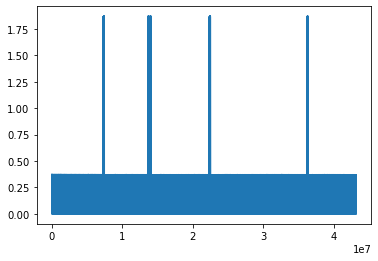

In [5]:
photodiode_raw = tdms_file.group_channels('Photodiode')[0].data

plt.plot(photodiode_raw)
plt.show()

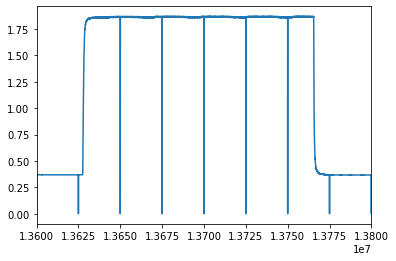

In [6]:
# Zoom in to see details of the higher resistance area

plt.plot(photodiode_raw)
plt.xlim(13600000, 13800000)
plt.show()

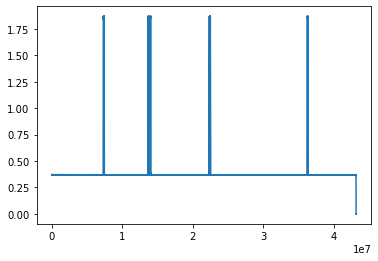

In [7]:
# There is a strange pulsing in the signal -- I'll remove this temporarily 

low_pulse_indexes = np.where(photodiode_raw < 0.1)
photodiode_smoothed = photodiode_raw

for i in low_pulse_indexes:
    photodiode_smoothed[i] = photodiode_smoothed[i-1]

plt.plot(photodiode_smoothed)


(7200000, 8000000)

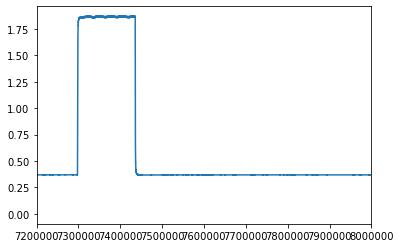

In [8]:
# Zoom in to check whether they are now single pulses

plt.plot(photodiode_smoothed)
plt.xlim(7200000, 8000000)

# Data looks very easy to analyse, set threshold and get stim times

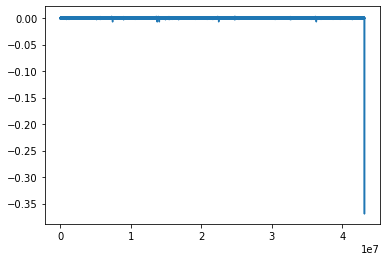

In [14]:
photodiode_thresholded = np.diff(photodiode_smoothed)
plt.plot(photodiode_thresholded)


ZeroDivisionError: integer division or modulo by zero

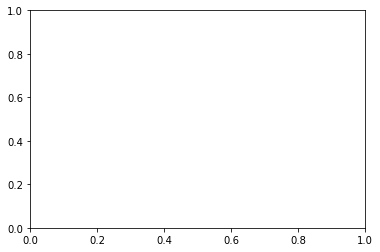

In [10]:
stim_times = np.where(differences_photodiode > 1.0)
plt.plot(stim_times)
plt.show()
print(stim_times)

In [ ]:
spider_camera_input = tdms_file.group_channels('spider_camera_input')[0].data

plt.plot(spider_camera_input)
plt.xlim(0,200)